# SMV2rho: Tutorial 2

In this tutorial we will see how we can convert a velocity profile to density using Brocher's (2005) approach.

We will try out two ways of doing this.  First, we will use the class construct that we developed in `tutorial_1`, and secondly we will use a function for those users who aren't perhaps as comfortable using classes.

First let's import the required modules from `SMV2rho`.

In [6]:
# import modules
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd

## Class approach
### Load file

We can load in the test Vp velocity profile.  Since we are using the default filw structure, we won't specify `seismic_method_name` or `region_name` this time.

In [7]:
# path to test velocity file
#  - this file comes with the distribution so there is no need to change this path
vp_file = "../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat"

# load a profile into the Convert class
profile = smd.Convert(vp_file, profile_type = "Vp")

### Read data

Now read the data in the velocity profile file.

In [8]:
# read data
profile.read_data()

### Convert profile

Now we can convert the profile using the `Vp_to_density_brocher` method and inspect the dupdated data dictionary.

In [9]:
# xonvert Vp profile using 
profile.Vp_to_density_brocher()
# show data diictionary
profile.data

{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'EUROPE',
 'rho': array([[  0.        ,   2.5119241 ],
        [ -2.5       ,   2.5119241 ],
        [ -2.51      ,   3.03672643],
        [-16.2       ,   3.03672643],
        [-16.21      ,   2.81506916],
        [-37.2       ,   2.81506916]]),
 'av_rho': 2.8762876075085257}

### Plotting

We can now see that the data dictionary has a `'rho'` entry.  We can plot this profile using some of the routines in the `plotting` module.

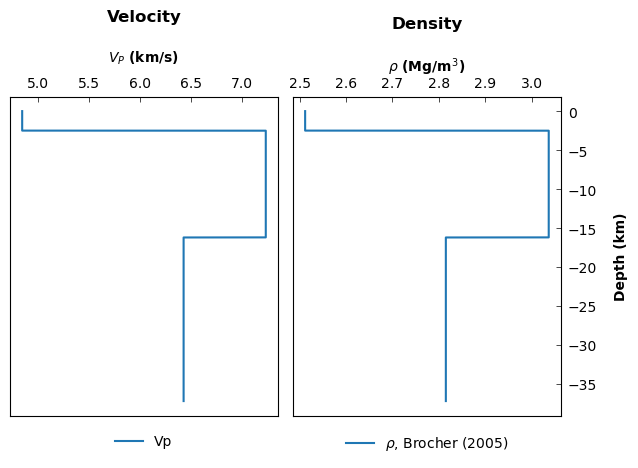

In [10]:
# organise data for pltting
data1 = [{'x': profile.data["Vp"][:,1], 
          'y': profile.data["Vp"][:,0],
          'label': "Vp"}]

data2 = [{'x': profile.data["rho"][:,1], 
          'y': profile.data["rho"][:,0],
          'label': r'$\rho$, Brocher (2005)'}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type='line', 
            cmap=None, titles=['Velocity', 'Density'], 
            xlabels=[r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)'], 
            ylabels=['Depth (km)', 'Depth (km)'],
            z_values=None, figure_scale=0.8, 
            save_path=None)

## Function approach

Alternatively, if we prefer to work with functions than classes, then we can convert the velocity profile using a wrapper function.  In this case, everything is calculated and the appropriate classes and functions are called in the backend so that the user doesn't have to run individual methods.  This approach reduces flexibility but makes it possible to convert the profile into density with a one-liner.  

First let's take a look at the docstring for the `convert_V_profile` function.

In [11]:
smd.convert_V_profile?

Signature:
smd.convert_V_profile(
    file,
    profile_type,
    write_data=False,
    path=None,
    approach='stephenson',
    location=None,
    parameters=None,
    constant_depth=None,
    constant_density=None,
    T_dependence=False,
    working_file=False,
)
Docstring:
Convert a single Vp or Vs velocity profile using the chosen scheme.

This function takes a velocity profile file and converts it to density values
using the specified approach, which can be "brocher" or "stephenson".

Args:
    file (str): Path to the input velocity profile file.
    profile_type (str): Type of velocity profile, 'Vp' or 'Vs'.
    write_data (bool, optional): Write out the converted data to files. 
        Default is False.
    path (str, optional): Location to write out the results. Default 
        is None.
    approach (str, optional): Density conversion scheme to use, "brocher" 
        or "stephenson".
    location (str, optional): Regional location of the profile. Default 
        is "None"

Now we can use it to convert our velocity profile using the Brocher's (2005) approach.  This time, we should see an output string telling us the path to the file that is being converted.  We can also print the output to check that the result is the same as before.

In [12]:
# call density conversion function
# note that using profile_type="Vs" first calls a function to convert to Vp
# as is required by Brocher's (2005) approach.
profile_brocher = smd.convert_V_profile(vp_file, 
                            profile_type="Vp", 
                            approach="brocher",
                            working_file = True)

# print output dictionary to check values
profile_brocher

working on ../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat


{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'EUROPE',
 'rho': array([[  0.        ,   2.5119241 ],
        [ -2.5       ,   2.5119241 ],
        [ -2.51      ,   3.03672643],
        [-16.2       ,   3.03672643],
        [-16.21      ,   2.81506916],
        [-37.2       ,   2.81506916]]),
 'av_rho': 2.8762876075085257}

### Plotting

We can plot up the result to check it is the same as before

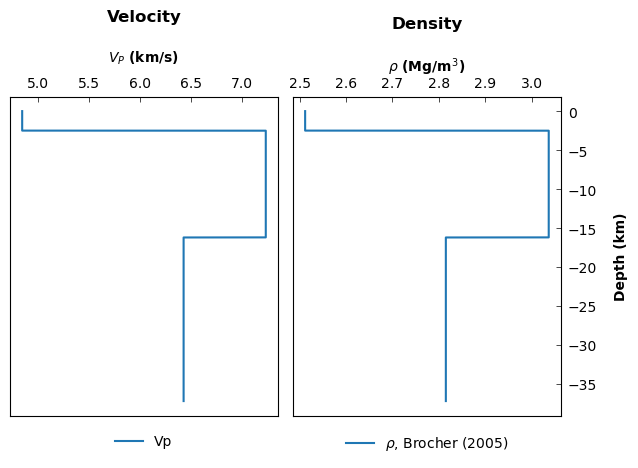

In [13]:
# organise data for pltting
data1 = [{'x': profile_brocher["Vp"][:,1], 
          'y': profile_brocher["Vp"][:,0],
          'label': "Vp"}]

data2 = [{'x': profile_brocher["rho"][:,1], 
          'y': profile_brocher["rho"][:,0],
          'label': r'$\rho$, Brocher (2005)'}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type='line', 
            cmap=None, titles=['Velocity', 'Density'], 
            xlabels=[r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)'], 
            ylabels=['Depth (km)', 'Depth (km)'],
            z_values=None, figure_scale=0.8, 
            save_path=None)